## EDA & Data Cleansing

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, cohen_kappa_score
import shap

# Load 
data = pd.read_csv("/Users/saurabhkankekar/Downloads/finalcredit.csv")
data.head(25)


id customer_id  month                name     age          ssn  \
0   0x1628A  CUS_0x1000  April      Alistair Barrf  17.375  913-74-1218   
1    0x66A2  CUS_0x1009  April              Arunah  25.750  063-67-6938   
2    0x1EF6  CUS_0x100b  April            Shirboni  18.500  238-62-0395   
3   0x17646  CUS_0x1011  April           Schneyerh  43.875  793-05-8223   
4   0x243EA  CUS_0x1013  April            Cameront  43.750  930-49-9615   
5   0x19416  CUS_0x1015  April             Holtono  27.000  810-97-7024   
6   0x1DEDA  CUS_0x1026  April             Josephv  51.500  500-62-9044   
7    0x722A  CUS_0x102d  April    Neil Chatterjeex  30.375  692-71-7552   
8   0x1778A  CUS_0x102e  April               Rhysn  25.750  352-23-4930   
9    0xB9D6  CUS_0x1032  April              Wahbap  40.000  620-58-8045   
10   0x3BB2  CUS_0x1037  April            Matthewm  44.375  230-22-9583   
11  0x21D86  CUS_0x1038  April                 B.h  27.250  355-00-7832   
12   0xE00A  CUS_0x103e  April          Tim Kellyf  40.000  155-72-8070   
13  0x257FA  CUS_0x1044  April       Maki Shirakip  44.000  261-18-4430   
14  0x188BE  CUS_0x1048  April      Janet McGurtyg  26.750  808-81-2470   
15  0x119FA  CUS_0x104a  April               Leahk  36.750  652-58-5852   
16   0x212A  CUS_0x104e  April            Kentaros  50.000  837-93-5062   
17  0x24A3E  CUS_0x104f  April               Markm  19.750  264-84-8069   
18  0x2422E  CUS_0x1051  April     Lucia Mutikanin  41.375  232-33-7638   
19   0x4302  CUS_0x1056  April             Hornbyb  44.000  081-93-4350   
20  0x1EB6A  CUS_0x1057  April     David Sheppardv  45.625  741-07-3912   
21   0x37FE  CUS_0x105b  April  Patricia Zengerlel  24.000  066-65-6008   
22  0x12042  CUS_0x105c  April              Lopezz  54.000  998-18-7252   
23  0x215FA  CUS_0x1063  April     Sylvia Westallq  19.625  883-38-8680   
24   0x347A  CUS_0x1069  April     Andreas Cremero  32.000  761-27-5143   

       occupation  annual_income  monthly_inhand_salary  credit_history_age  \
0          Lawyer      30625.940            2706.161600              45.500   
1        Mechanic      52312.680            4250.390000             127.875   
2   Media_Manager     113781.390            9549.782000              66.875   
3          Doctor      58918.470            5208.872600              66.500   
4        Mechanic      98620.980            7962.415000              74.875   
5      Journalist      46951.020            3725.585000              87.875   
6         Manager     170614.280           14463.856000              84.875   
7    Entrepreneur      89064.520            7256.043500             124.875   
8       Scientist      50807.440            4197.953000              95.875   
9          Lawyer      60410.940            5274.245000              67.875   
10     Accountant      15989.085            1086.423700              82.625   
11      Architect     129473.160           10959.430000              83.500   
12      Scientist      98690.800            8262.233000             111.875   
13   Entrepreneur      33441.590            2748.799000             131.500   
14     Accountant      42387.540            3680.295000              43.875   
15       Mechanic      14981.390            1461.449200             131.500   
16        Teacher      19180.870            1688.405900             103.500   
17      Architect      11336.835             992.736270              63.875   
18       Engineer      35022.220            2859.518300             115.500   
19   Entrepreneur      16053.860            1196.821700              67.875   
20         Writer      86617.160            7250.096700             103.500   
21     Accountant      34428.210            2467.983675             115.000   
22     Journalist     127617.600           10596.800000              99.875   
23      Architect     128698.760           10628.896000              71.875   
24     Accountant      58637.340            4799.445000             124.500   

   

Credit Score Distribution:
 credit_score
1    5927
0    3939
2    2221
Name: count, dtype: int64


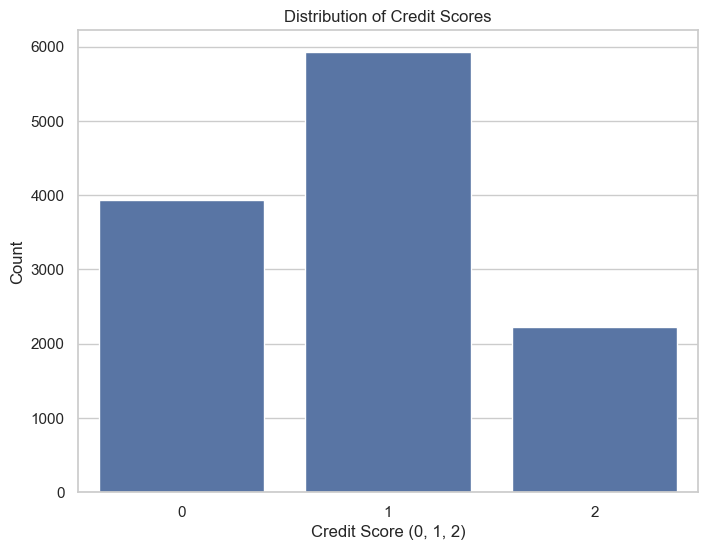

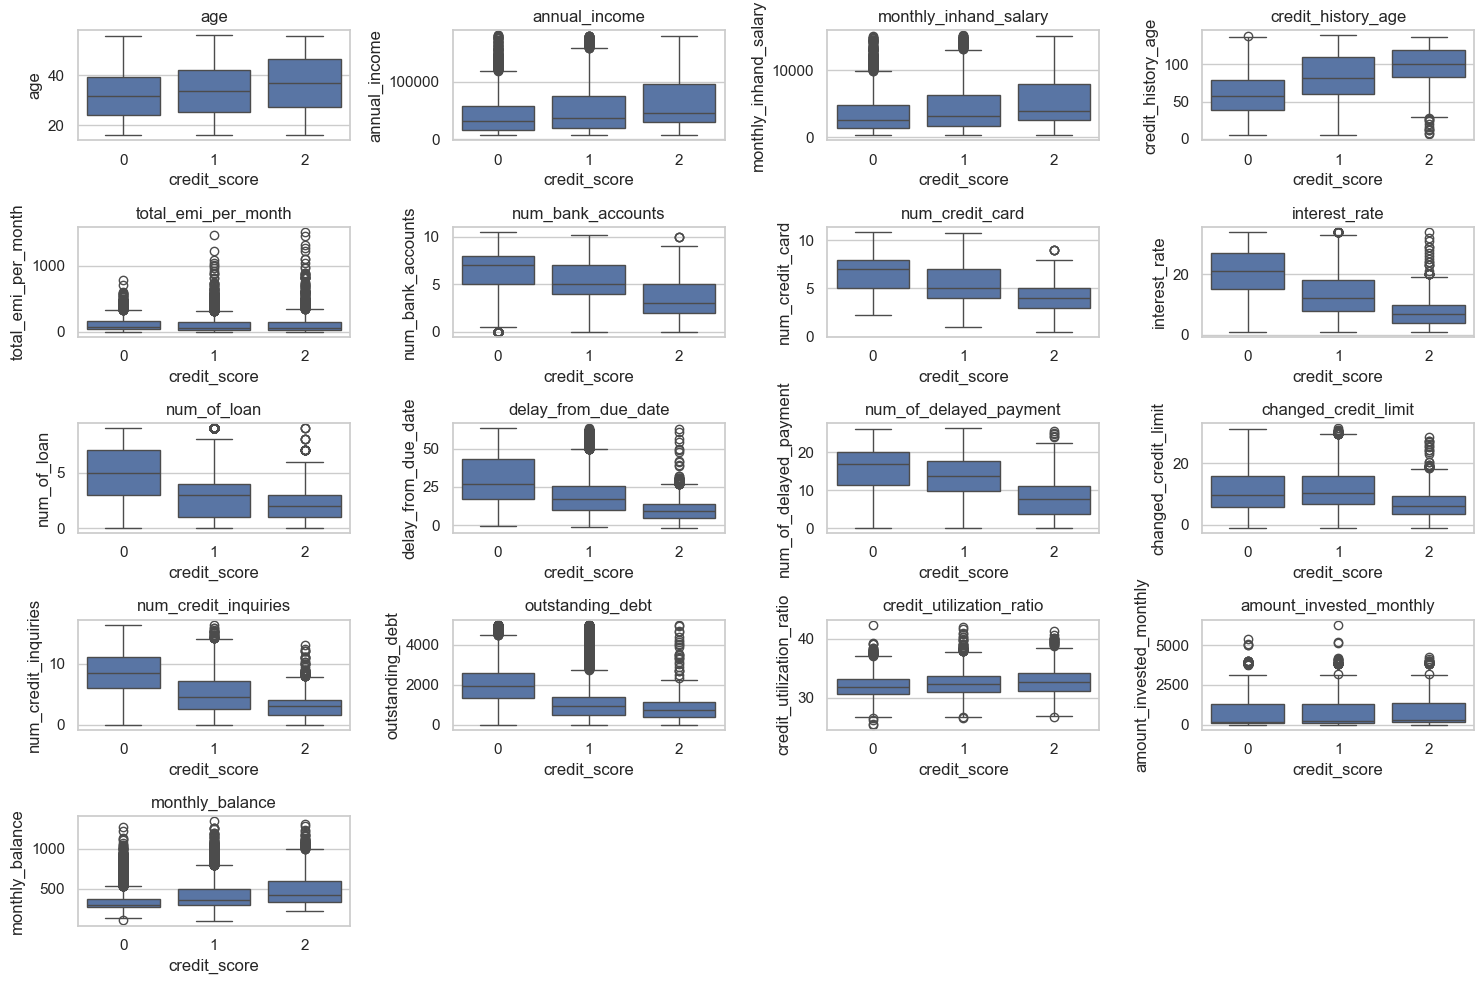

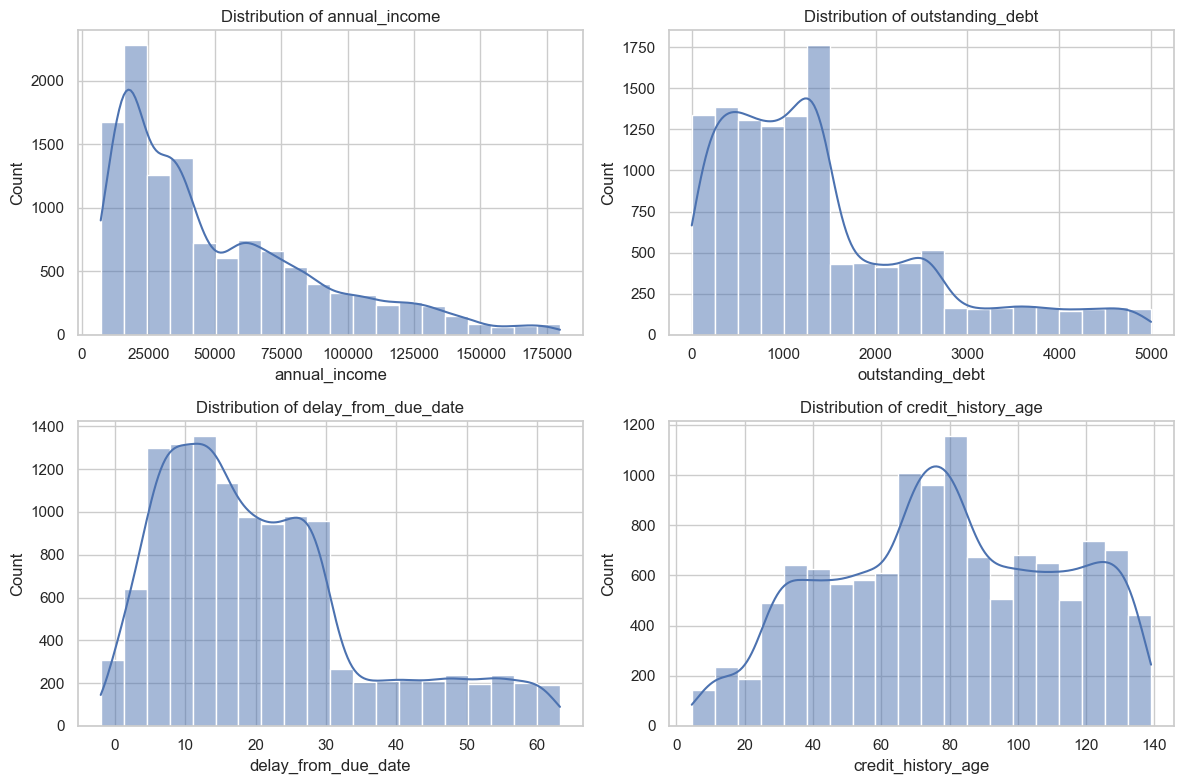

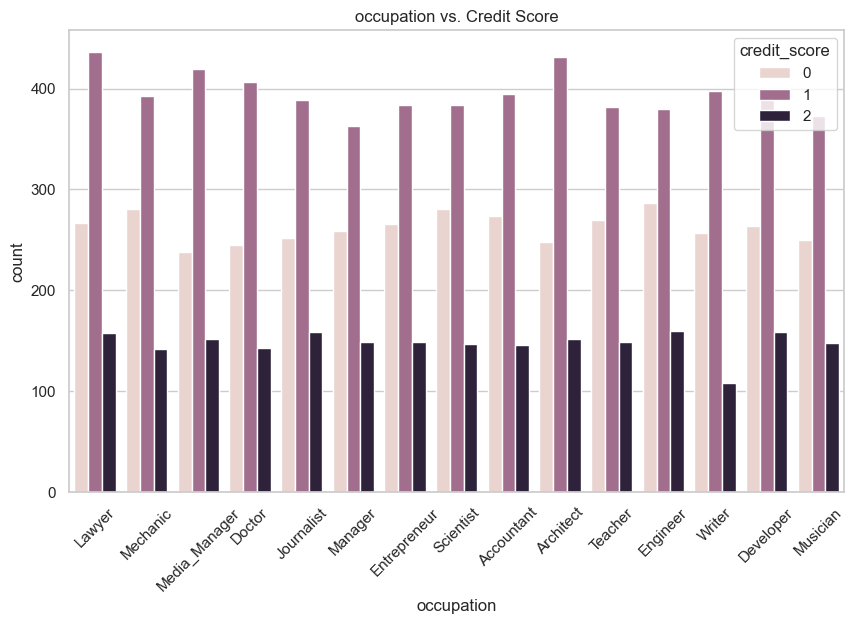

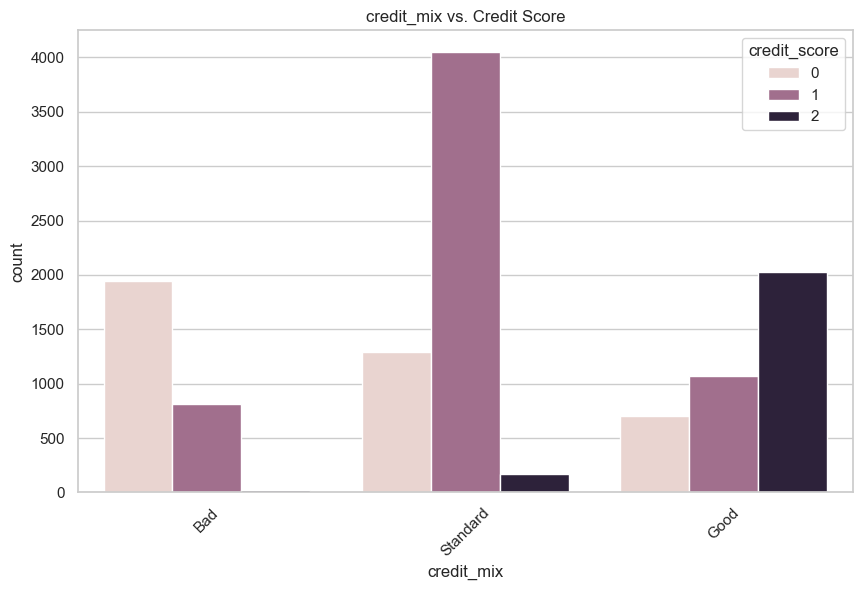

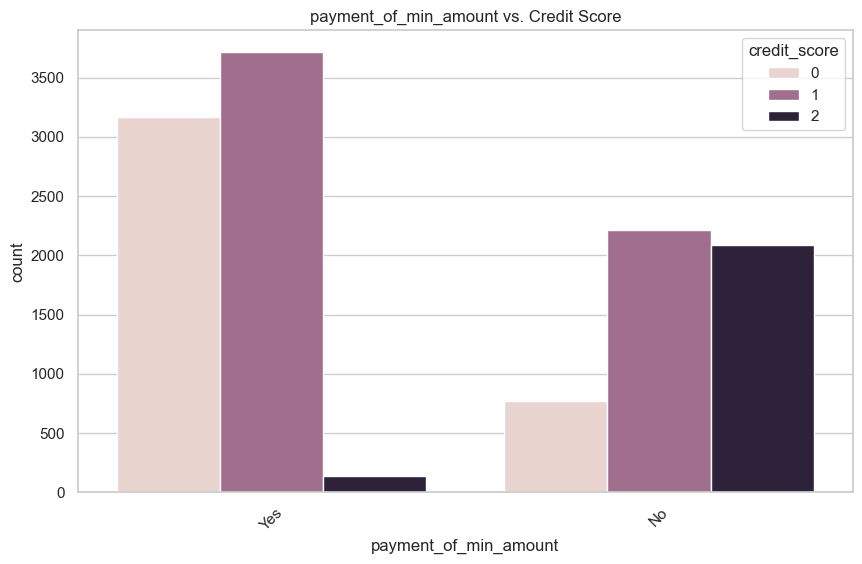

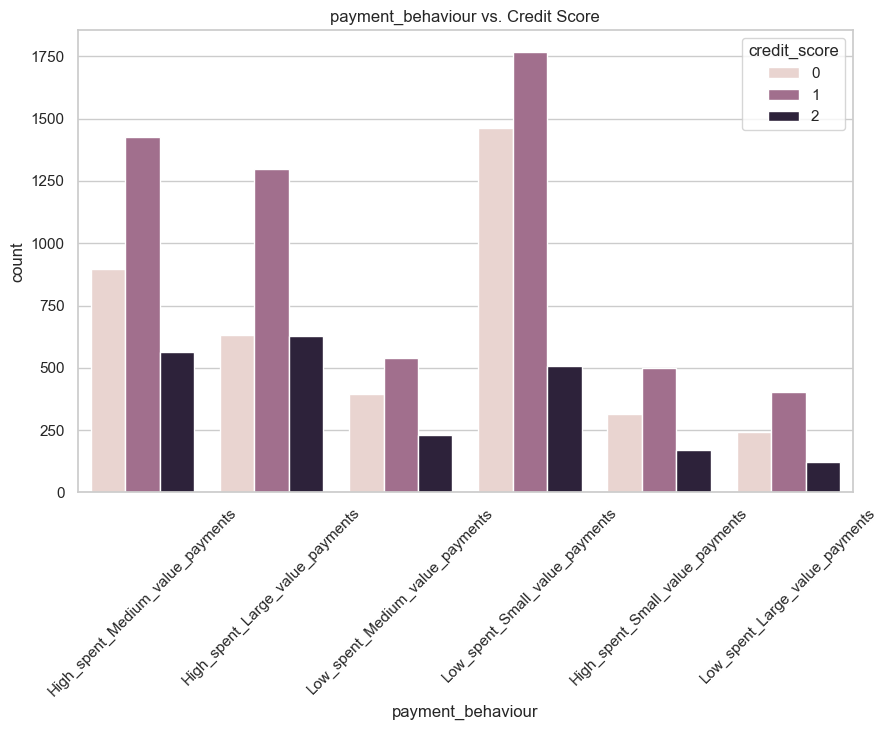

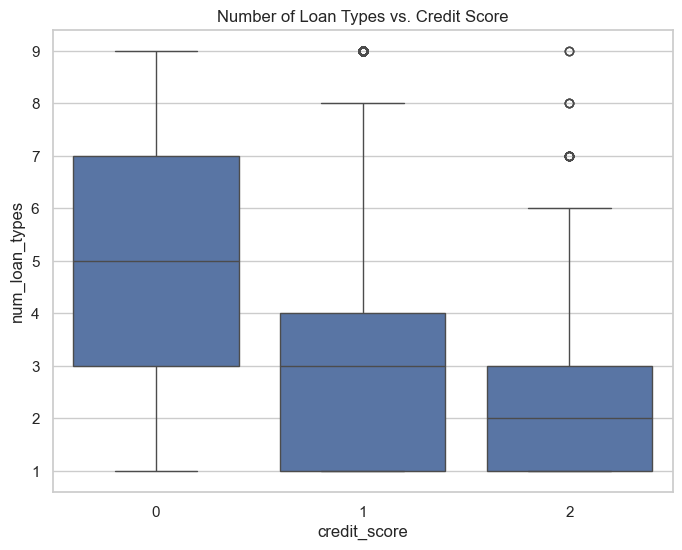

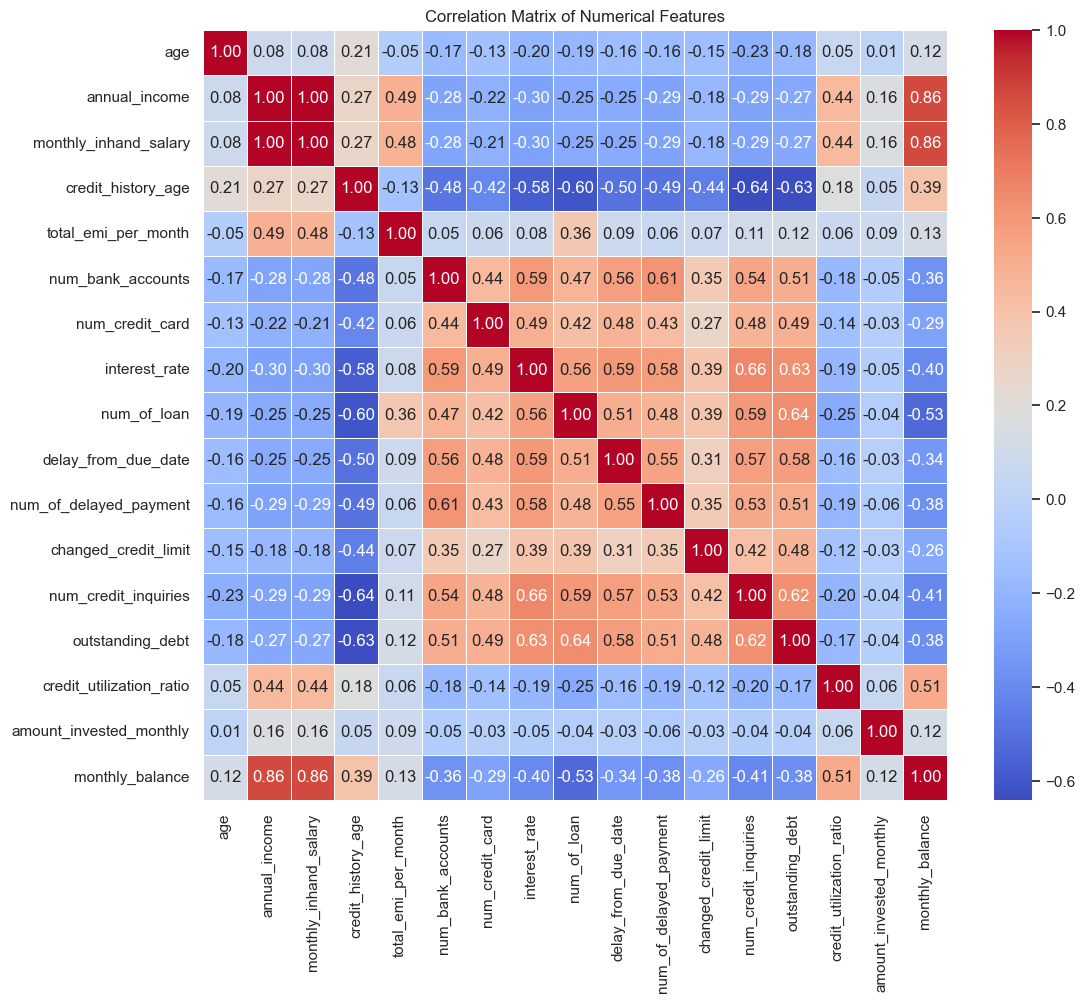

Missing Values:
 id                          0
customer_id                 0
month                       0
name                        0
age                         0
ssn                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
credit_history_age          0
total_emi_per_month         0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
type_of_loan                0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
payment_of_min_amount       0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
credit_score                0
num_loan_types              0
dtype: int64


In [22]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Target Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='credit_score', data=data)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score (0, 1, 2)')
plt.ylabel('Count')
print("Credit Score Distribution:\n", data['credit_score'].value_counts())
plt.show()

# 2. Numerical Features
numerical_cols = ['age', 'annual_income', 'monthly_inhand_salary', 'credit_history_age',
                  'total_emi_per_month', 'num_bank_accounts', 'num_credit_card',
                  'interest_rate', 'num_of_loan', 'delay_from_due_date',
                  'num_of_delayed_payment', 'changed_credit_limit',
                  'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
                  'amount_invested_monthly', 'monthly_balance']

# Boxplots for numerical features vs. credit_score
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x='credit_score', y=col, data=data)
    plt.title(col)
plt.tight_layout()
plt.show()

# Histograms for key numerical features
key_numerical = ['annual_income', 'outstanding_debt', 'delay_from_due_date', 'credit_history_age']
plt.figure(figsize=(12, 8))
for i, col in enumerate(key_numerical, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 3. Categorical Features
categorical_cols = ['occupation', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='credit_score', data=data)
    plt.title(f'{col} vs. Credit Score')
    plt.xticks(rotation=45)
    plt.show()

# Feature Engineering: Parse type_of_loan (count number of loans)
data['num_loan_types'] = data['type_of_loan'].apply(lambda x: len(eval(x)))
plt.figure(figsize=(8, 6))
sns.boxplot(x='credit_score', y='num_loan_types', data=data)
plt.title('Number of Loan Types vs. Credit Score')
plt.show()

# 4. Correlation Matrix (numerical features only)
plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 5. Missing Values
print("Missing Values:\n", data.isnull().sum())


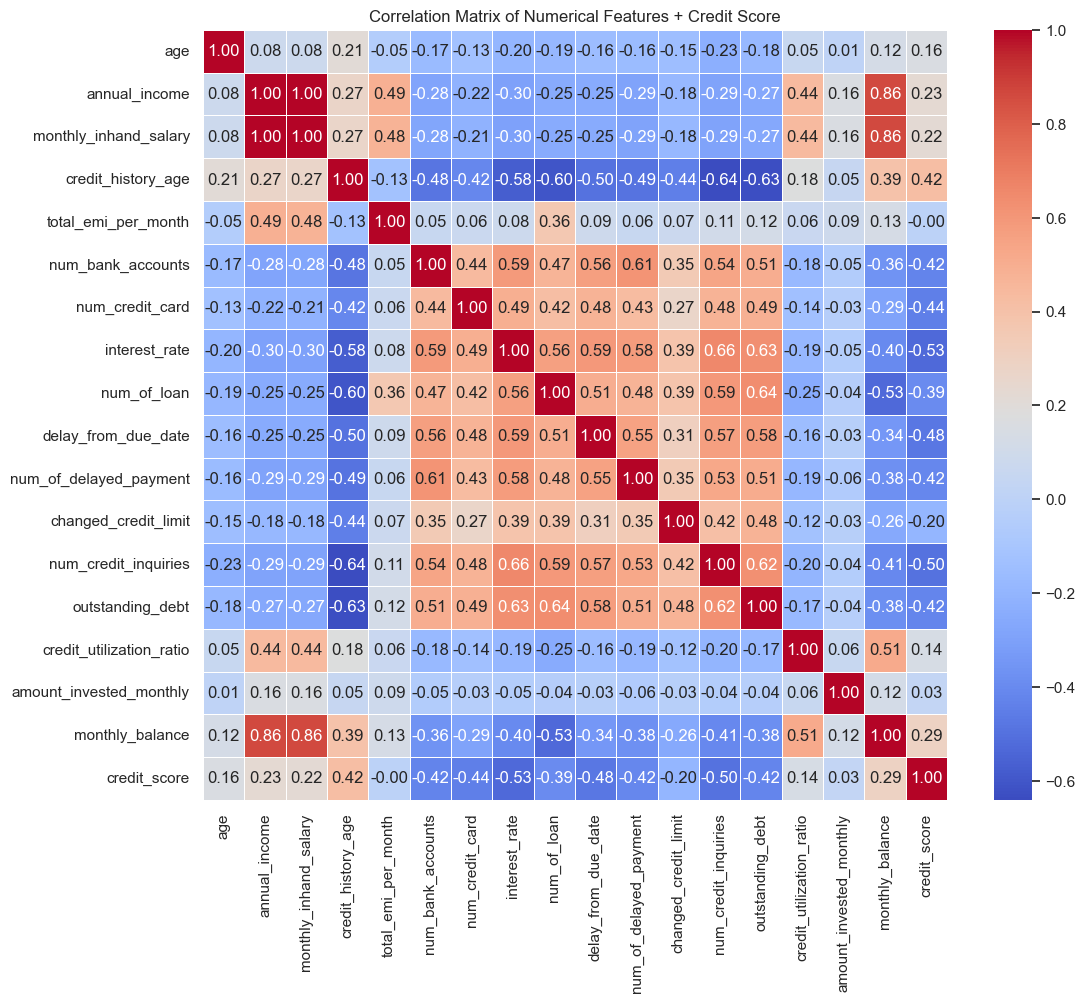

In [24]:


# Select numerical features + credit_score
numerical_cols = ['age', 'annual_income', 'monthly_inhand_salary', 'credit_history_age',
                 'total_emi_per_month', 'num_bank_accounts', 'num_credit_card',
                 'interest_rate', 'num_of_loan', 'delay_from_due_date',
                 'num_of_delayed_payment', 'changed_credit_limit',
                 'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
                 'amount_invested_monthly', 'monthly_balance', 'credit_score']
corr_matrix = data[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features + Credit Score')
plt.show()



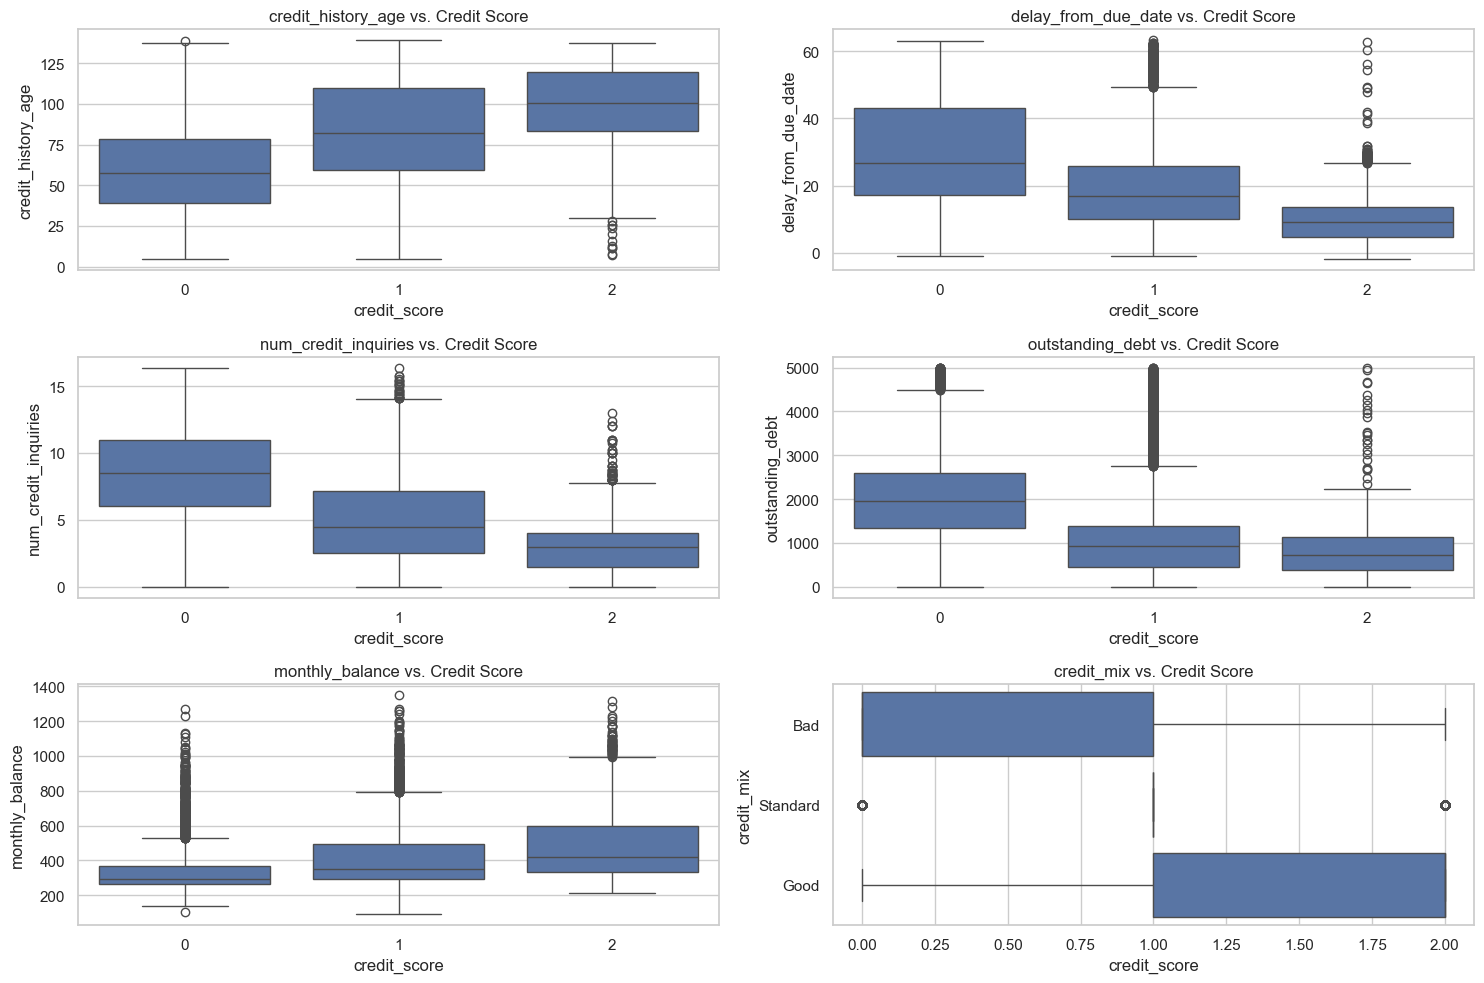

In [32]:

key_features = ['credit_history_age', 'delay_from_due_date', 'num_credit_inquiries', 'outstanding_debt', 'monthly_balance', 'credit_mix']

plt.figure(figsize=(15, 10))
for i, col in enumerate(key_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='credit_score', y=col, data=data)
    plt.title(f'{col} vs. Credit Score')
plt.tight_layout()
plt.show()

**Key Takeaways**

**Ordinal Nature Confirmed:**  The boxplots show a clear ordinal trend (0 < 1 < 2) for all features, supporting your use of Quadratic Weighted Kappa as the evaluation metric. For example:
credit_history_age increases from 0 to 2.
delay_from_due_date, num_credit_inquiries, and outstanding_debt decrease from 0 to 2.
monthly_balance increases from 0 to 2.

**Feature Importance:** These features (credit_history_age, delay_from_due_date, num_credit_inquiries, outstanding_debt, monthly_balance) are strong predictors, as expected from the correlations.

**Outliers:** Significant outliers, especially in Poor (0), suggest potential data issues or extreme cases (e.g., very high delays or debts). You might consider capping or investigating these outliers during preprocessing.

**Class Imbalance: **The distribution (53% 1, 28% 0, 18% 2) is visible in the boxplot widths, with Standard (1) having the largest sample size. This reinforces the need for class weights or sampling in modeling.

###

## Modelling & Interpretation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, cohen_kappa_score
import matplotlib.pyplot as plt


import warnings
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

# Load data
data = pd.read_csv("Revised Credit Score Dataset.csv",skiprows=1)

data.head()


id customer_id  month            name     age          ssn  \
0  0x1628A  CUS_0x1000  April  Alistair Barrf  17.375  913-74-1218   
1   0x66A2  CUS_0x1009  April          Arunah  25.750  063-67-6938   
2   0x1EF6  CUS_0x100b  April        Shirboni  18.500  238-62-0395   
3  0x17646  CUS_0x1011  April       Schneyerh  43.875  793-05-8223   
4  0x243EA  CUS_0x1013  April        Cameront  43.750  930-49-9615   

      occupation  annual_income  monthly_inhand_salary  credit_history_age  \
0         Lawyer       30625.94              2706.1616              45.500   
1       Mechanic       52312.68              4250.3900             127.875   
2  Media_Manager      113781.39              9549.7820              66.875   
3         Doctor       58918.47              5208.8726              66.500   
4       Mechanic       98620.98              7962.4150              74.875   

   ...  changed_credit_limit  num_credit_inquiries  credit_mix  \
0  ...                 1.880                10.875         Bad   
1  ...                 9.730                 3.000    Standard   
2  ...                10.965                 1.750        Good   
3  ...                14.170                 7.000    Standard   
4  ...                 1.705                 3.000        Good   

   outstanding_debt  credit_utilization_ratio payment_of_min_amount  \
0           1562.91                 33.477546                   Yes   
1            202.68                 29.839984                   Yes   
2           1030.20                 34.841450                    No   
3            473.14                 27.655897                   Yes   
4           1233.51                 31.933940                    No   

   amount_invested_monthly                 payment_behaviour  monthly_balance  \
0               158.549737  High_spent_Medium_value_payments       335.375339   
1               146.679375  High_spent_Medium_value_payments       428.743153   
2              1711.742894   High_spent_Large_value_payments       781.229780   
3              1522.178296   Low_spent_Medium_value_payments       332.642842   
4               355.442410  High_spent_Medium_value_payments       472.781003   

   credit_score  
0             0  
1             1  
2             0  
3             1  
4             1  

[5 rows x 28 columns]

In [ ]:
## Extracting type of loan
df = data[['customer_id','type_of_loan']]

df['type_of_loan'] = df['type_of_loan'].apply(lambda x: eval(x) if isinstance(x, str) else x)

df_expanded = df.explode('type_of_loan')

df_encoded = pd.get_dummies(df_expanded, columns=['type_of_loan'])

df_final = df_encoded.groupby('customer_id').sum().reset_index()

df_final


customer_id  type_of_loan_Auto Loan  type_of_loan_Credit-Builder Loan  \
0      CUS_0x1000                       0                                 1   
1      CUS_0x1009                       0                                 1   
2      CUS_0x100b                       0                                 0   
3      CUS_0x1011                       0                                 1   
4      CUS_0x1013                       0                                 0   
...           ...                     ...                               ...   
12082   CUS_0xff3                       1                                 0   
12083   CUS_0xff4                       1                                 1   
12084   CUS_0xff6                       1                                 0   
12085   CUS_0xffc                       0                                 1   
12086   CUS_0xffd                       1                                 0   

       type_of_loan_Debt Consolidation Loan  type_of_loan_Home Equity Loan  \
0                                         0                              1   
1                                         0                              1   
2                                         0                              0   
3                                         1                              0   
4                                         1                              0   
...                                     ...                            ...   
12082                                     0                              0   
12083                                     0                              0   
12084                                     0                              1   
12085                                     0                              3   
12086                                     0                              1   

       type_of_loan_Mortgage Loan  type_of_loan_No Loan  \
0                               0                     0   
1                               0                     0   
2                               0                     1   
3                               0                     0   
4                               0                     0   
...                           ...                   ...   
12082                           1                     0   
12083                           0                     0   
12084                           0                     0   
12085                           0                     0   
12086                           1                     0   

       type_of_loan_Not Specified  type_of_loan_Payday Loan  \
0                               0                         0   
1                               1                         1   
2                               0                         0   
3                               0                         0   
4                               0                         0   
...                           ...                       ...   
12082                           0                         0   
12083                           1                         0   
12084                           0                         0   
12085                           1                         1   
12086                           0                         3   

       type_of_loan_Personal Loan  type_of_loan_Student Loan  
0                               0                          0  
1                               0                          0  
2                               0                          0  
3                               0                          1  
4                               1                          1  
...                           ...                        ...  
12082                           1                          0  
12083                           0                          2  
12084                           0                          0  
12085                   

In [ ]:
## Merge the final transformed data with the original data
data = pd.merge(data, df_final, on='customer_id', how='left')

# Drop irrelevant and redundant columns
data = data.drop(['id', 'customer_id', 'month', 'name', 'ssn', 'monthly_inhand_salary', 'amount_invested_monthly'], axis=1)

# Feature Engineering: Parse type_of_loan
data['num_loan_types'] = data['type_of_loan'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)


# Drop original type_of_loan after extracting num_loan_types
data = data.drop('type_of_loan', axis=1)



# Encode categorical variables
le = LabelEncoder()
data['credit_mix'] = le.fit_transform(data['credit_mix'])  # Bad=0, Good=1, Standard=2
data['payment_of_min_amount'] = data['payment_of_min_amount'].map({'No': 0, 'Yes': 1})

# One-hot encode
data = pd.get_dummies(data, columns=['occupation', 'payment_behaviour'], drop_first=True)




In [ ]:

# Define features and target
X = data.drop('credit_score', axis=1)
y = data['credit_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import optuna
import contextlib
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder

In [ ]:

numerical_features = X.select_dtypes(include=['number']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
    ],
    remainder='passthrough'  
)


def objective_lr(trial, X, y):
    with contextlib.suppress(ValueError):
        X_train_fold, X_val, y_train_fold, y_val = train_test_split(X, y, test_size=0.2,  random_state=trial.suggest_int('seed', 0, 1000), stratify=y)

        pipeline = Pipeline([
            ('preprocessor', preprocessor),  # Now only scales
            ('classifier', LogisticRegression(
                random_state=42,
                solver='liblinear',
                penalty=trial.suggest_categorical('penalty', ['l1', 'l2']),
                C=trial.suggest_float('C', 1e-5, 10, log=True),
            ))
        ])

        pipeline.fit(X_train_fold, y_train_fold)
        preds = pipeline.predict(X_val)
        f1 = f1_score(y_val, preds, average='weighted')
        kappa = cohen_kappa_score(y_val, preds, weights='quadratic')
        return f1, kappa


study_lr = optuna.create_study(directions=["maximize", "maximize"])  
study_lr.optimize(lambda trial: objective_lr(trial, X_train, y_train), n_trials=50, timeout=600)

best_trial_lr = sorted(study_lr.best_trials, key=lambda t: t.values[0], reverse=True)[0]

best_params_lr = best_trial_lr.params

best_model_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        random_state=42,
        solver='liblinear',
        penalty=best_params_lr['penalty'],
        C=best_params_lr['C'],
        class_weight='balanced'  
    ))
])

best_model_lr.fit(X_train, y_train)
y_pred_lr = best_model_lr.predict(X_test)

f1_test_lr = f1_score(y_test, y_pred_lr, average='weighted')
kappa_test_lr = cohen_kappa_score(y_test, y_pred_lr, weights='quadratic')
print(f"Logistic Regression Test F1: {f1_test_lr:.4f}")
print(f"Logistic Regression Test Weighted Kappa: {kappa_test_lr:.4f}")

[I 2025-03-08 00:10:41,438] A new study created in memory with name: no-name-bb1e0ac9-2621-445f-a91b-f7611a4e08b0
[I 2025-03-08 00:10:41,615] Trial 0 finished with values: [0.6955288793366297, 0.6016851936233264] and parameters: {'seed': 854, 'penalty': 'l1', 'C': 0.057769183196953615}.
[I 2025-03-08 00:10:41,660] Trial 1 finished with values: [0.7090697896076283, 0.5564477191085017] and parameters: {'seed': 897, 'penalty': 'l2', 'C': 0.00014355890343438032}.
[I 2025-03-08 00:10:41,723] Trial 2 finished with values: [0.6845026506403121, 0.5712389452278218] and parameters: {'seed': 100, 'penalty': 'l1', 'C': 0.03137527067940946}.
[I 2025-03-08 00:10:41,759] Trial 3 finished with values: [0.6485568341529909, 0.5474776943237463] and parameters: {'seed': 439, 'penalty': 'l2', 'C': 1.0281982271008862e-05}.
[I 2025-03-08 00:10:41,889] Trial 4 finished with values: [0.6758331384631301, 0.5628364623510546] and parameters: {'seed': 875, 'penalty': 'l2', 'C': 0.02983430977189227}.
[I 2025-03-08 

Logistic Regression Test F1: 0.6963
Logistic Regression Test Weighted Kappa: 0.5876


In [ ]:
def objective_rf(trial, X, y):
    with contextlib.suppress(ValueError):

        X_train_fold, X_val, y_train_fold, y_val = train_test_split(X, y, test_size=0.2, random_state=trial.suggest_int('seed', 0, 1000), stratify=y)

        pipeline = Pipeline([
            ('preprocessor', preprocessor),  # Only scaling now
            ('classifier', RandomForestClassifier(
                random_state=42,
                n_estimators=trial.suggest_int('n_estimators', 50, 400),
                max_depth=trial.suggest_int('max_depth', 4, 20),
                min_samples_split=trial.suggest_int('min_samples_split', 2, 20),
                min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10),
                bootstrap=trial.suggest_categorical('bootstrap', [True, False]),
            ))
        ])

        pipeline.fit(X_train_fold, y_train_fold)
        preds = pipeline.predict(X_val)

        f1 = f1_score(y_val, preds, average='weighted')
        kappa = cohen_kappa_score(y_val, preds, weights='quadratic')
        return f1, kappa


study_rf = optuna.create_study(directions=["maximize", "maximize"])  
study_rf.optimize(lambda trial: objective_rf(trial, X_train, y_train), n_trials=50, timeout=600)


# --- Refit with Best Parameters and Evaluate ---
best_trial_rf = sorted(study_rf.best_trials, key=lambda t: t.values[0], reverse=True)[0]
best_params_rf = best_trial_rf.params

best_model_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        n_estimators=best_params_rf['n_estimators'],
        max_depth=best_params_rf['max_depth'],
        min_samples_split=best_params_rf['min_samples_split'],
        min_samples_leaf=best_params_rf['min_samples_leaf'],
        bootstrap=best_params_rf['bootstrap']
    ))
])

best_model_rf.fit(X_train, y_train)
y_pred_rf = best_model_rf.predict(X_test)

# Calculate and print both metrics on the test set
f1_test_rf = f1_score(y_test, y_pred_rf, average='weighted')
kappa_test_rf = cohen_kappa_score(y_test, y_pred_rf, weights='quadratic')
print(f"Random Forest Test F1: {f1_test_rf:.4f}")
print(f"Random Forest Test Weighted Kappa: {kappa_test_rf:.4f}")

[I 2025-03-08 00:10:46,564] A new study created in memory with name: no-name-bbf4127f-8a0d-4a1f-932b-5ad153814a93
[I 2025-03-08 00:10:49,241] Trial 0 finished with values: [0.7592165721672828, 0.6517240300111227] and parameters: {'seed': 934, 'n_estimators': 224, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 3, 'bootstrap': True}.
[I 2025-03-08 00:10:50,048] Trial 1 finished with values: [0.6977968342105174, 0.594263272815992] and parameters: {'seed': 375, 'n_estimators': 138, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 2, 'bootstrap': False}.
[I 2025-03-08 00:10:55,328] Trial 2 finished with values: [0.760828286394199, 0.66649582958423] and parameters: {'seed': 60, 'n_estimators': 377, 'max_depth': 12, 'min_samples_split': 16, 'min_samples_leaf': 8, 'bootstrap': False}.
[I 2025-03-08 00:10:55,768] Trial 3 finished with values: [0.7402607179287337, 0.6285389843403046] and parameters: {'seed': 536, 'n_estimators': 56, 'max_depth': 8, 'min_samples_split':

In [ ]:
import xgboost as xgb


In [ ]:
def objective_xgb(trial, X, y):
    with contextlib.suppress(ValueError):
        X_train_fold, X_val, y_train_fold, y_val = train_test_split(X, y, test_size=0.2, random_state=trial.suggest_int('seed', 0, 1000), stratify=y)

        pipeline = Pipeline([
            ('preprocessor', preprocessor),  
            ('classifier', xgb.XGBClassifier(
                random_state=42,
                n_estimators=trial.suggest_int('n_estimators', 50, 400),
                learning_rate=trial.suggest_float('learning_rate', 1e-5, 0.3, log=True),
                max_depth=trial.suggest_int('max_depth', 4, 20),
                subsample=trial.suggest_float('subsample', 0.5, 1.0),
                colsample_bytree=trial.suggest_float('colsample_bytree', 0.5, 1.0),
                use_label_encoder=False,
                eval_metric='logloss'
            ))
        ])

        pipeline.fit(X_train_fold, y_train_fold)
        preds = pipeline.predict(X_val)
        f1 = f1_score(y_val, preds, average='weighted')
        kappa = cohen_kappa_score(y_val, preds, weights='quadratic')
        return f1, kappa



study_xgb = optuna.create_study(directions=["maximize", "maximize"]) 
study_xgb.optimize(lambda trial: objective_xgb(trial, X_train, y_train), n_trials=50, timeout=600)


best_trial_xgb = sorted(study_xgb.best_trials, key=lambda t: t.values[0], reverse=True)[0] 

best_params_xgb = best_trial_xgb.params
best_model_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(
        random_state=42,
        n_estimators=best_params_xgb['n_estimators'],
        learning_rate=best_params_xgb['learning_rate'],
        max_depth=best_params_xgb['max_depth'],
        subsample=best_params_xgb['subsample'],
        colsample_bytree=best_params_xgb['colsample_bytree'],
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

best_model_xgb.fit(X_train, y_train)
y_pred_xgb = best_model_xgb.predict(X_test)

f1_test_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
kappa_test_xgb = cohen_kappa_score(y_test, y_pred_xgb, weights='quadratic')
print(f"XGBoost Test F1: {f1_test_xgb:.4f}")
print(f"XGBoost Test Weighted Kappa: {kappa_test_xgb:.4f}")



[I 2025-03-07 22:32:15,541] A new study created in memory with name: no-name-c569ceb6-c994-4738-80e7-9b43acae7911
[I 2025-03-07 22:32:17,581] Trial 0 finished with values: [0.7583240565228643, 0.6797547977862177] and parameters: {'seed': 588, 'n_estimators': 121, 'learning_rate': 0.027228578653931673, 'max_depth': 14, 'subsample': 0.5788062916518466, 'colsample_bytree': 0.8843367175948497}.
[I 2025-03-07 22:32:21,741] Trial 1 finished with values: [0.7535261385678196, 0.6769822688190648] and parameters: {'seed': 929, 'n_estimators': 220, 'learning_rate': 2.9852959832417954e-05, 'max_depth': 15, 'subsample': 0.853831059573877, 'colsample_bytree': 0.5968258959580357}.
[I 2025-03-07 22:32:28,657] Trial 2 finished with values: [0.7517299161724653, 0.6784173616622646] and parameters: {'seed': 182, 'n_estimators': 314, 'learning_rate': 0.006449903782322522, 'max_depth': 19, 'subsample': 0.6552644058244, 'colsample_bytree': 0.8507865683416026}.
[I 2025-03-07 22:32:31,799] Trial 3 finished wit

XGBoost Test F1: 0.7705
XGBoost Test Weighted Kappa: 0.6825


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, cohen_kappa_score
import catboost as cb
from sklearn.pipeline import Pipeline
import optuna
import contextlib
from sklearn.datasets import make_classification


def objective_cb(trial, X, y):
    with contextlib.suppress(ValueError):
        X_train_fold, X_val, y_train_fold, y_val = train_test_split(X, y, test_size=0.2,  stratify=y)

        param = {
            "iterations": trial.suggest_int("iterations", 100, 400),
            "learning_rate": trial.suggest_float("learning_rate", 1e-5, 0.3, log=True),
            "depth": trial.suggest_int("depth", 4, 10),
            "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
            "random_strength": trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
            "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
            "border_count": trial.suggest_int("border_count", 32, 255),
            "loss_function": "MultiClass",
            "eval_metric": "MultiClass", 
            "random_seed": 42,
            "verbose": False,
        }

        pipeline = Pipeline([
            ('preprocessor', preprocessor),  
            ('classifier', cb.CatBoostClassifier(**param))
        ])

        pipeline.fit(X_train_fold, y_train_fold, classifier__eval_set=[(X_val, y_val)], classifier__early_stopping_rounds=25)

        preds = pipeline.predict(X_val)
        f1 = f1_score(y_val, preds, average='weighted')
        kappa = cohen_kappa_score(y_val, preds, weights='quadratic')
        return f1, kappa

study_cb = optuna.create_study(directions=["maximize", "maximize"])  
study_cb.optimize(lambda trial: objective_cb(trial, X_train, y_train), n_trials=50, timeout=600)



best_trial_cb = sorted(study_cb.best_trials, key=lambda t: t.values[0], reverse=True)[0]
best_params_cb = best_trial_cb.params


best_params_cb["loss_function"] = "MultiClass"
best_params_cb["eval_metric"] = "MultiClass"
best_params_cb["random_seed"] = 42
best_params_cb["verbose"] = False

best_model_cb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', cb.CatBoostClassifier(**best_params_cb))
])

best_model_cb.fit(X_train, y_train) 
y_pred_cb = best_model_cb.predict(X_test)

f1_test_cb = f1_score(y_test, y_pred_cb, average='weighted')
kappa_test_cb = cohen_kappa_score(y_test, y_pred_cb, weights='quadratic')
print(f"CatBoost Test F1: {f1_test_cb:.4f}")
print(f"CatBoost Test Weighted Kappa: {kappa_test_cb:.4f}")

[I 2025-03-07 22:34:53,043] A new study created in memory with name: no-name-a1bcb6e3-b23d-4438-85ae-8af9fc6ff1f3
[I 2025-03-07 22:34:53,892] Trial 0 finished with values: [0.7484540627471452, 0.6661971740950903] and parameters: {'iterations': 368, 'learning_rate': 0.0009058149337038503, 'depth': 9, 'l2_leaf_reg': 2.3340707919937693, 'random_strength': 2.3593618970655095e-05, 'bagging_temperature': 0.04133317278283333, 'border_count': 235}.
[I 2025-03-07 22:34:54,086] Trial 1 finished with values: [0.7419413394123134, 0.61864072564743] and parameters: {'iterations': 197, 'learning_rate': 0.00010736705427469501, 'depth': 6, 'l2_leaf_reg': 3.8418642205000845e-05, 'random_strength': 0.0009907392627155193, 'bagging_temperature': 0.6380746183831857, 'border_count': 226}.
[I 2025-03-07 22:34:54,277] Trial 2 finished with values: [0.7314187866649243, 0.6192218853832603] and parameters: {'iterations': 378, 'learning_rate': 9.280655480610089e-05, 'depth': 6, 'l2_leaf_reg': 2.3967709884532358e-0

CatBoost Test F1: 0.7599
CatBoost Test Weighted Kappa: 0.6632


In [ ]:
results_df = {
        "F1 Score" : [f1_test_lr,f1_test_rf,f1_test_xgb,f1_test_cb],
        "Weighted Kappa" : [kappa_test_lr,kappa_test_rf,kappa_test_xgb,kappa_test_cb]
    }

results_df = pd.DataFrame(results_df, index=['Logistic Regression', 'Random Forest', 'XGBoost', 'CatBoost'])
results_df

F1 Score  Weighted Kappa
Logistic Regression  0.711884        0.596828
Random Forest        0.770261        0.679732
XGBoost              0.770515        0.682454
CatBoost             0.759878        0.663174

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(best_model_rf, X_test, y_test,
                           n_repeats=10,
                           random_state=0)


In [ ]:
imp_df = pd.DataFrame(r['importances_mean'], index=X_test.columns,columns=["Feature Importance"]).sort_values(by="Feature Importance", ascending=False)[:5]
imp_df

Feature Importance
credit_mix                       0.113689
delay_from_due_date              0.060008
interest_rate                    0.049504
outstanding_debt                 0.038668
payment_of_min_amount            0.033457

Text(0.5, 1.0, 'Random Forest Feature Importance')

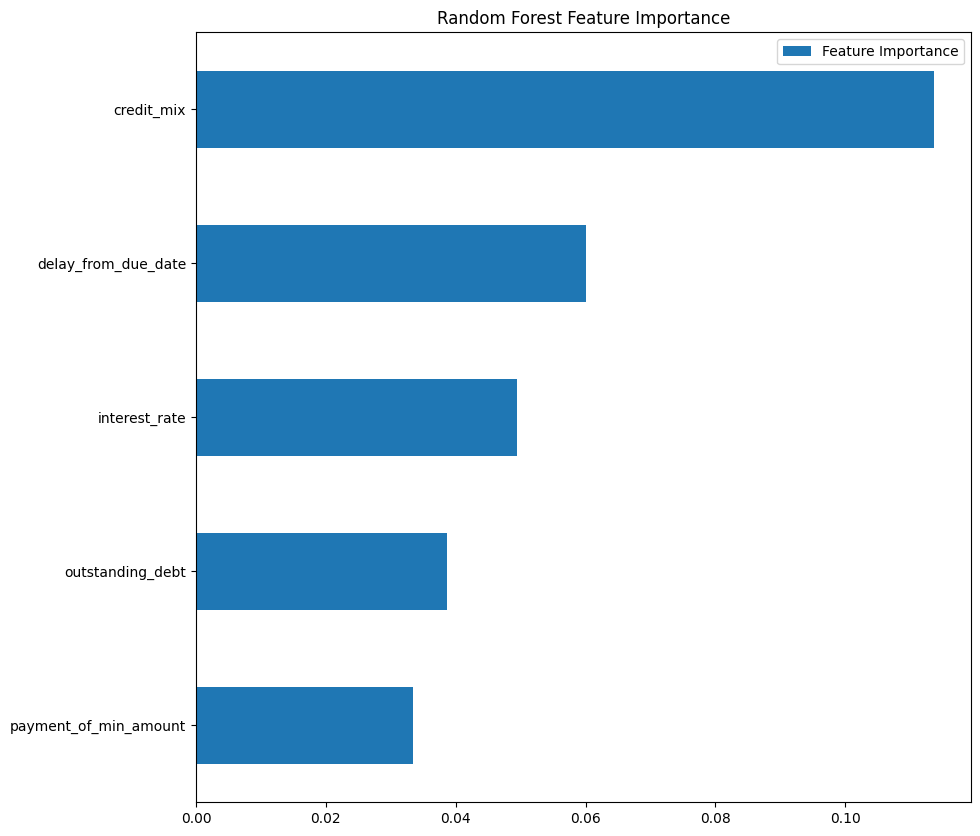

In [ ]:
imp_df.sort_values(by="Feature Importance").plot(kind='barh', figsize=(10, 10))
plt.title("Random Forest Feature Importance")

In [ ]:
importances = best_model_rf.named_steps['classifier'].feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
feature_imp_df.head(10)

Feature  Gini Importance
12              credit_mix         0.160216
13        outstanding_debt         0.146157
6            interest_rate         0.114825
8      delay_from_due_date         0.070780
5          num_credit_card         0.060116
10    changed_credit_limit         0.058270
11    num_credit_inquiries         0.056784
15   payment_of_min_amount         0.055536
9   num_of_delayed_payment         0.040694
2       credit_history_age         0.037734

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train, train_size=0.3, random_state=42, stratify=y_train
)  # Stratified sampling



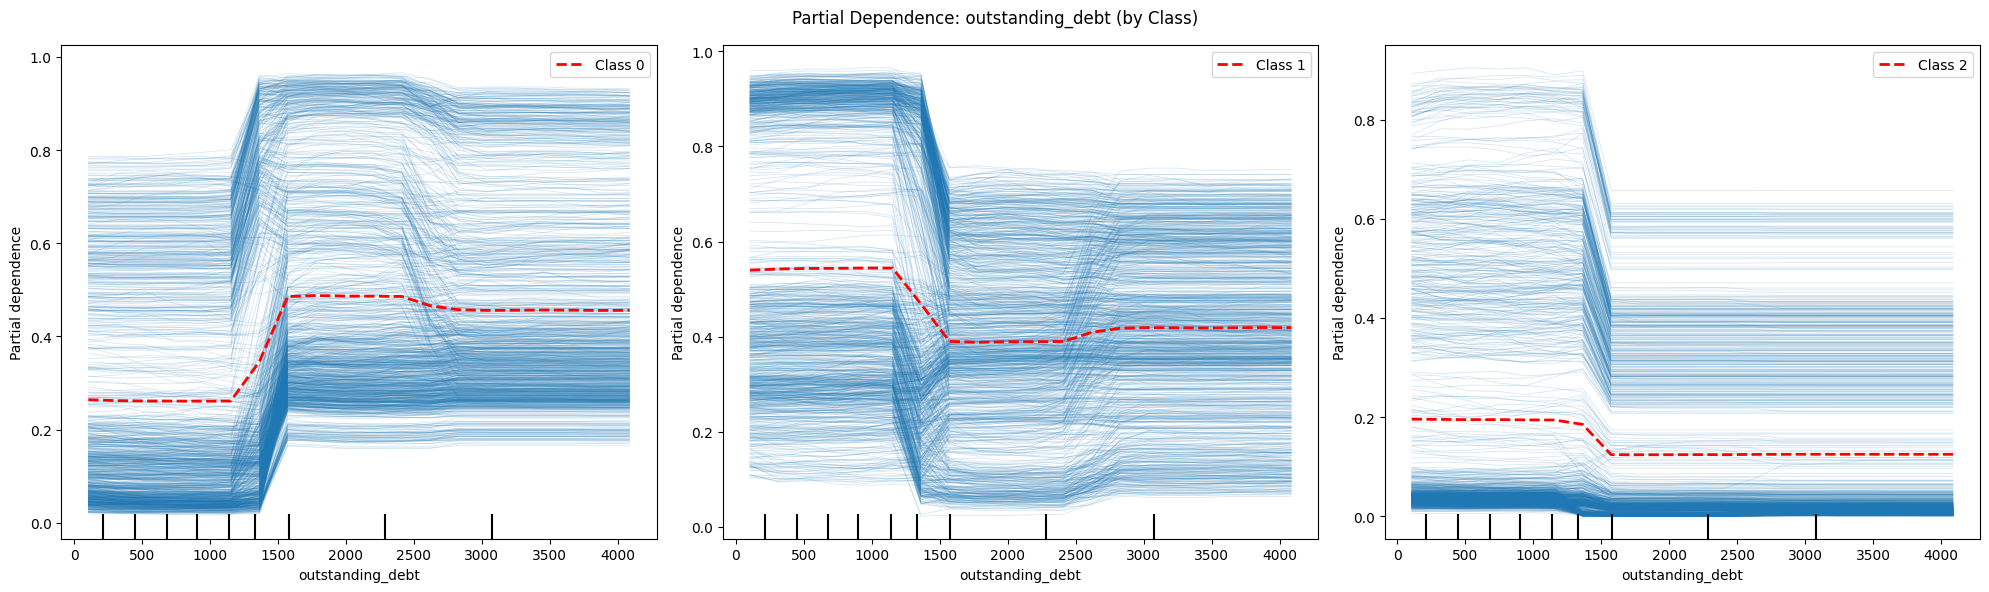

In [ ]:
fig, ax = plt.subplots(ncols=3,figsize=(20, 6))  

for class_label in [0,1,2]:
    PartialDependenceDisplay.from_estimator(
        best_model_rf,
        X_sample, 
        ['outstanding_debt'],
        ax=ax[class_label],
        feature_names=X_sample.columns,
        target=class_label,
        pd_line_kw={'label': f'Class {class_label}', 'color': 'red', 'linewidth': 2},
        ice_lines_kw = {'alpha': 0.2},
        grid_resolution= 20,
        kind='both'  
    )


fig.suptitle(f'Partial Dependence: outstanding_debt (by Class)')
plt.tight_layout()
plt.show()

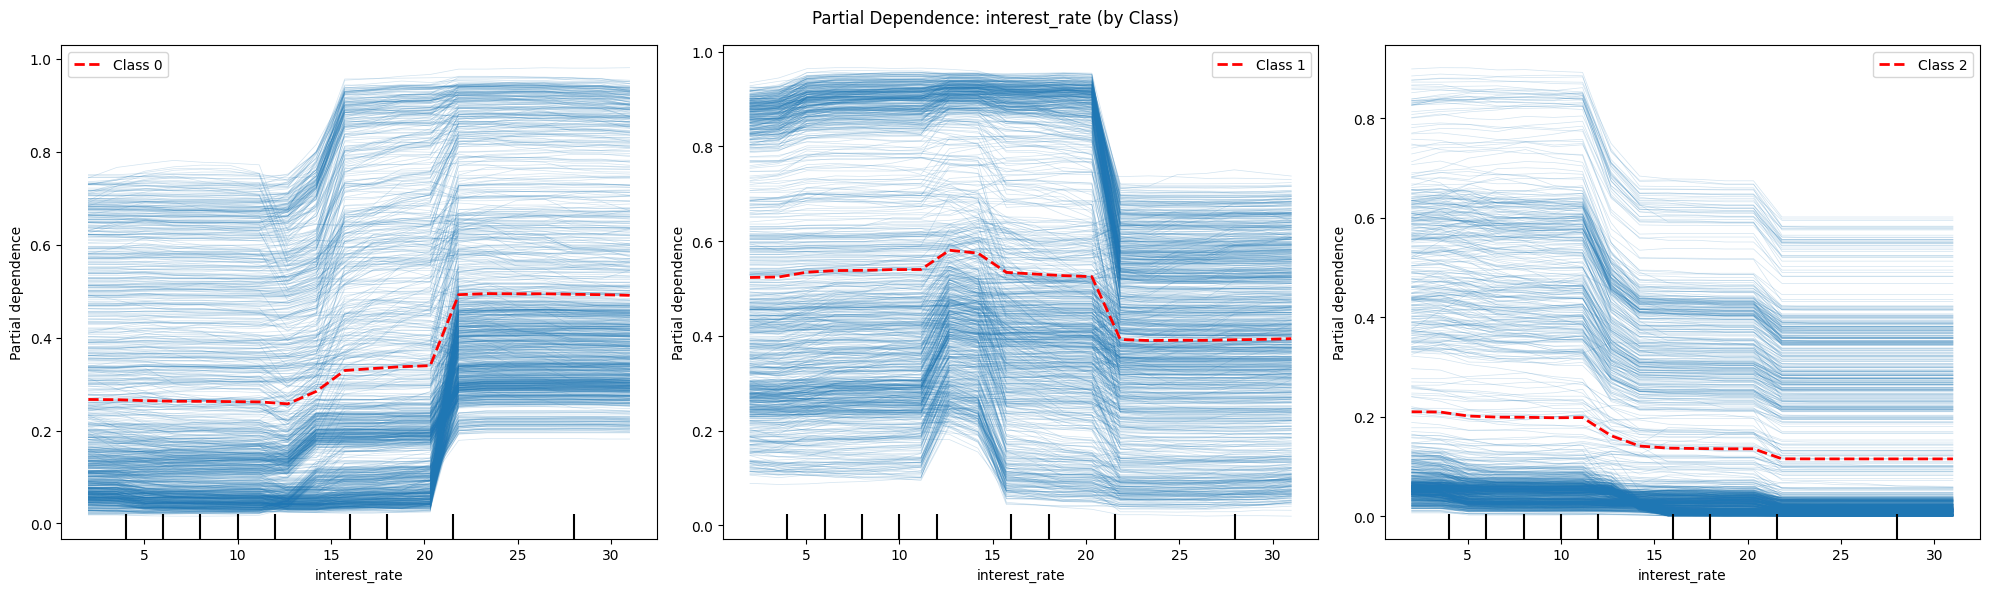

In [ ]:
fig, ax = plt.subplots(ncols=3,figsize=(20, 6))  
for class_label in [0,1,2]:
    PartialDependenceDisplay.from_estimator(
        best_model_rf,
        X_sample, 
        ['interest_rate'],
        ax=ax[class_label],
        feature_names=X_sample.columns,
        target=class_label,
        pd_line_kw={'label': f'Class {class_label}', 'color': 'red', 'linewidth': 2},
        ice_lines_kw = {'alpha': 0.2},
        grid_resolution= 20,
        kind='both'  
    )
    


fig.suptitle(f'Partial Dependence: interest_rate (by Class)')
plt.tight_layout()
plt.show()

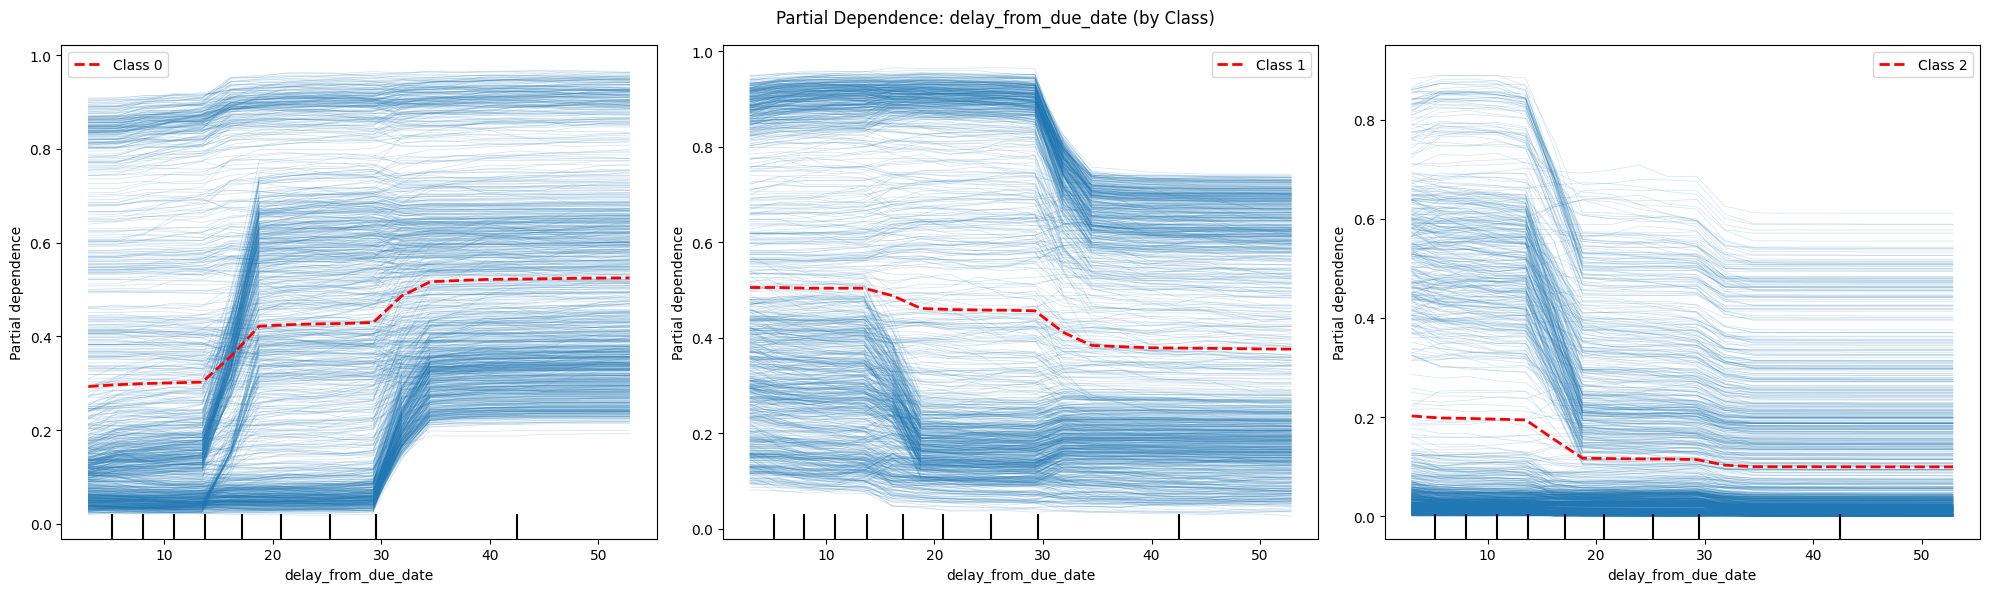

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 6)) 

for class_label in [0,1,2]:
    PartialDependenceDisplay.from_estimator(
        best_model_rf,
        X_sample, 
        ['delay_from_due_date'],
        ax=ax[class_label],
        feature_names=X_sample.columns,
        target=class_label,
        pd_line_kw={'label': f'Class {class_label}', 'color': 'red', 'linewidth': 2},
        ice_lines_kw = {'alpha': 0.2},
        grid_resolution= 20,
        kind='both'  
    )


fig.suptitle(f'Partial Dependence: delay_from_due_date (by Class)')
plt.tight_layout()
plt.show()

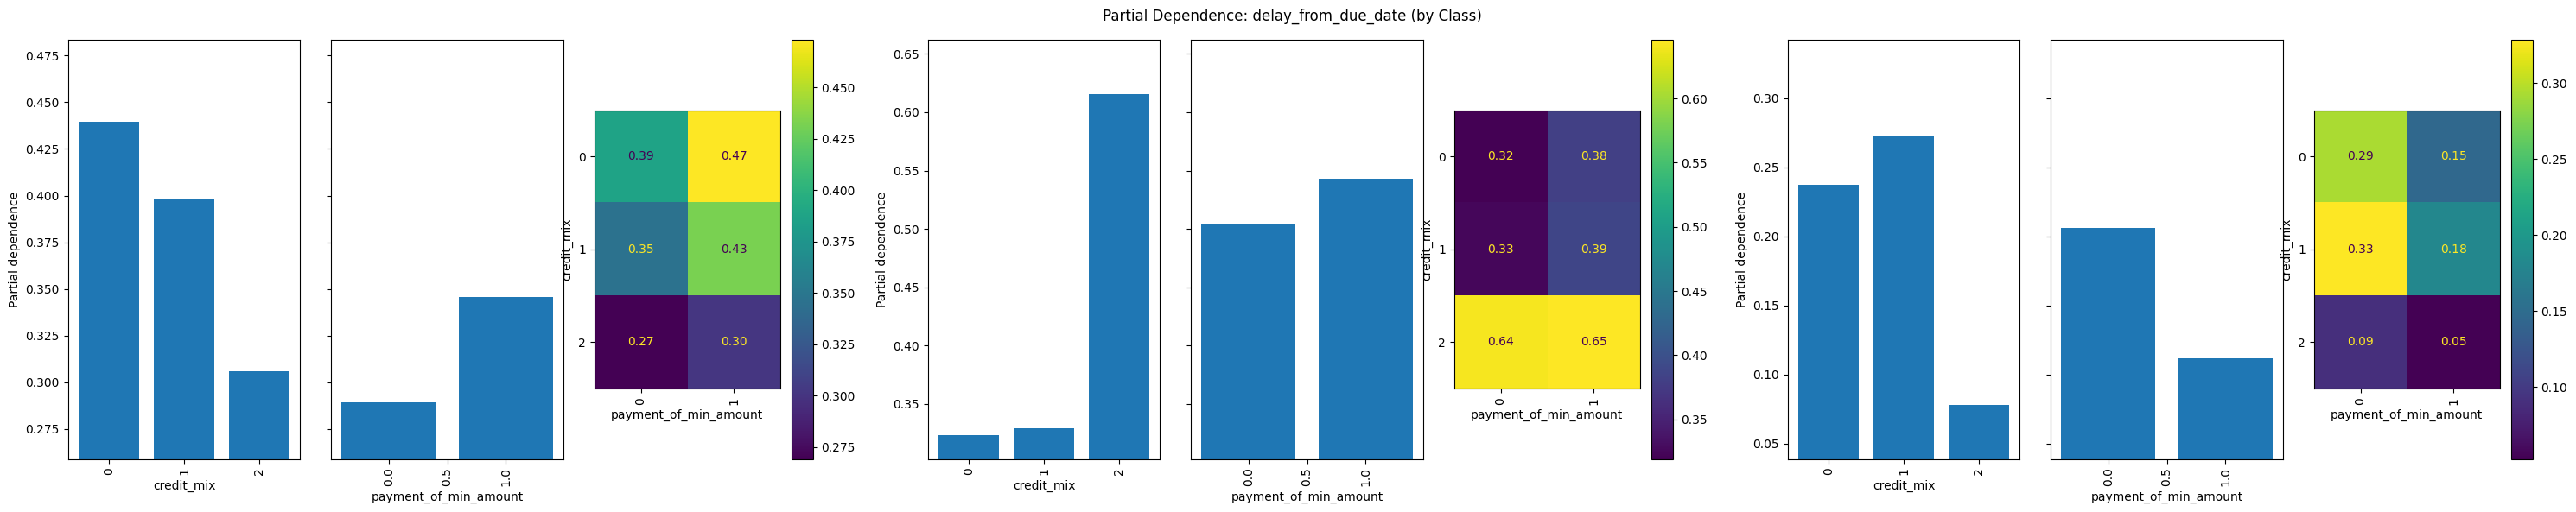

In [ ]:

fig, ax = plt.subplots(ncols=3, figsize=(30, 6)) 

for class_label in [0,1,2]:
    PartialDependenceDisplay.from_estimator(
        best_model_rf,
        X_sample, 
        features = ["credit_mix", "payment_of_min_amount", ("credit_mix", "payment_of_min_amount")],
        ax=ax[class_label],
        feature_names=X_sample.columns,
        target=class_label,
        categorical_features = ["credit_mix", "payment_of_min_amount"],
        grid_resolution= 20,
        kind='average'  
    )


# fig.legend()  # Add legend
fig.suptitle(f'Partial Dependence: delay_from_due_date (by Class)')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
import numpy as np


In [ ]:
def partial_dependence_custom(feature_to_plot, color_column, best_model_rf, X_sample ):
        
    par_dep_res = partial_dependence(
        best_model_rf, X_sample, [feature_to_plot], grid_resolution=20, kind='individual'
    )

    grid_values,pd_values = par_dep_res['grid_values'],par_dep_res['individual']

    if X_sample[color_column].nunique() == 2:
        colors = [ 'green','red']
    elif X_sample[color_column].nunique() == 3:
        colors = [ 'red','green','gold' ]

    # Create the scatter plot
    fig,ax = plt.subplots(ncols=3,figsize=(20, 6))

        

    for j in range(0,3):

        for i in range( 0, len(X_sample)):
            color = colors[ X_sample[color_column].values[i] ]
            ax[j].plot(grid_values[0], pd_values[j][i] , color=color, alpha=0.2)
            ax[j].set_ylabel(f'Probability Class {j}')
            ax[j].set_xlabel(feature_to_plot)

    fig.suptitle(f'Custom Partial Dependence: {feature_to_plot} (Colored by {color_column})')

    if X_sample[color_column].nunique() == 2:
        fig.legend(handles=[plt.Line2D([0], [0], color='green', label='Yes'),
                            plt.Line2D([0], [0], color='red', label='No')])

    elif X_sample[color_column].nunique() == 3:
        fig.legend(handles=[plt.Line2D([0], [0], color='red', label='Bad'),
                            plt.Line2D([0], [0], color='gold', label='Standard'),
                            plt.Line2D([0], [0], color='green', label='Good')])
        
    plt.tight_layout()
    plt.legend()
    plt.show()

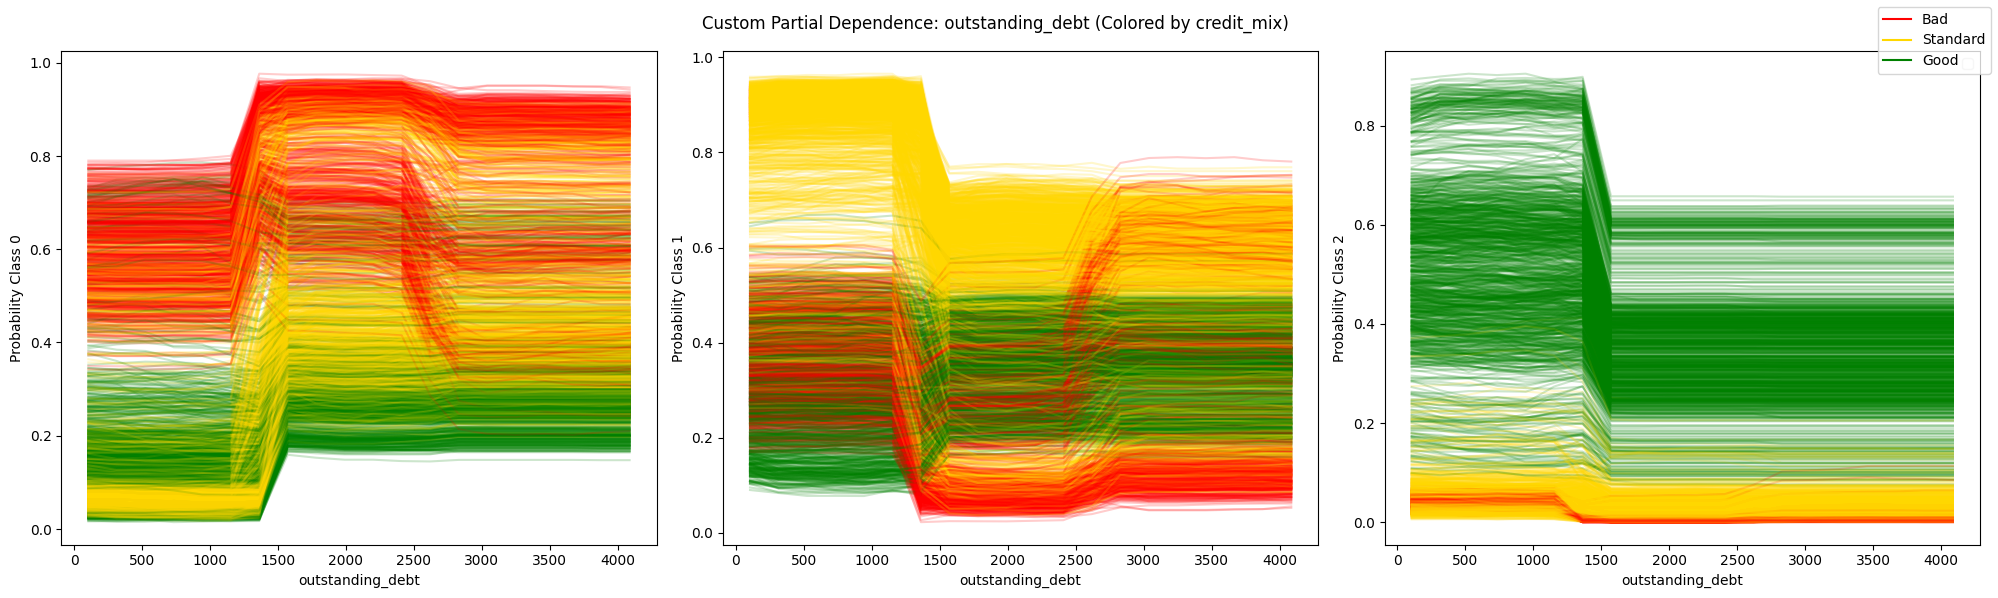

: 

In [ ]:
partial_dependence_custom('outstanding_debt', 'credit_mix', best_model_rf, X_sample)

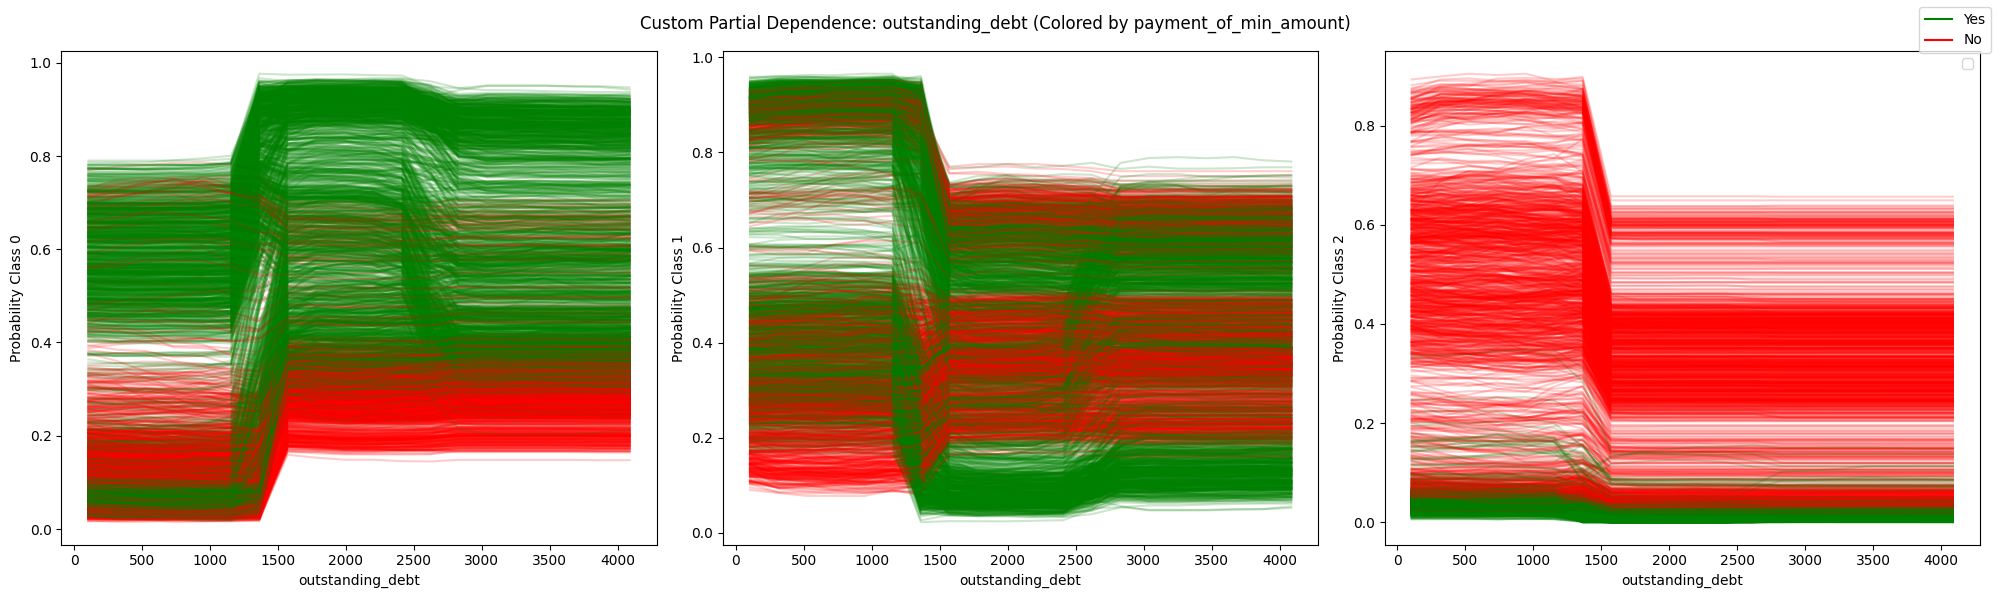

In [ ]:
partial_dependence_custom('outstanding_debt', 'payment_of_min_amount', best_model_rf, X_sample)